# Análisis Político-Económico de Asia Central
Este notebook analiza la evolución de los países de Asia Central (Kazajistán, Uzbekistán, Kirguistán, Tayikistán, Turkmenistán) centrada en:
- **Corrupción** (TI CPI, WBGI Control of Corruption)
- **Democracia** (BMR Democracy, Polity IV)
- **Economía** (PIB per cápita)


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar Spark
spark = SparkSession.builder \
    .appName("Analisis Asia Central") \
    .config("spark.jars", "/home/jovyan/work/jars/postgresql-42.7.3.jar") \
    .getOrCreate()


In [2]:
# Leer datos de Postgres
df = spark.read.format("jdbc") \
    .option("url", "jdbc:postgresql://postgres_db:5432/qog_data") \
    .option("dbtable", "qog_standard_ts") \
    .option("user", "user") \
    .option("password", "password") \
    .option("driver", "org.postgresql.Driver") \
    .load()

print(f"Total registros: {df.count()}")
df.printSchema()


Total registros: 12677
root
 |-- cname: string (nullable = true)
 |-- ccode: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- ccodecow: double (nullable = true)
 |-- gle_cgdpc: double (nullable = true)
 |-- bmr_dem: double (nullable = true)
 |-- ti_cpi: double (nullable = true)
 |-- wbgi_cce: double (nullable = true)
 |-- icrg_qog: double (nullable = true)
 |-- wdi_lifexp: double (nullable = true)



In [3]:
# Filtrar Países de Asia Central
central_asia_countries = ["Kazakhstan", "Uzbekistan", "Kyrgyzstan", "Tajikistan", "Turkmenistan"]
df_ca = df.filter(col("cname").isin(central_asia_countries))

print(f"Registros Asia Central: {df_ca.count()}")
df_ca.select("cname").distinct().show()


Registros Asia Central: 170
+------------+
|       cname|
+------------+
|  Tajikistan|
|Turkmenistan|
|  Uzbekistan|
|  Kyrgyzstan|
|  Kazakhstan|
+------------+



In [4]:
# Convertir a Pandas para visualización (dataset pequeño)
pdf = df_ca.toPandas()
pdf['year'] = pd.to_numeric(pdf['year'])
pdf.head()


,cname,ccode,year,ccodecow,gle_cgdpc,bmr_dem,ti_cpi,wbgi_cce,icrg_qog,wdi_lifexp
0,Turkmenistan,795.0,1992,701.0,5672.83,0.0,NaN,NaN,NaN,63.753
1,Turkmenistan,795.0,1993,701.0,6347.21,0.0,NaN,NaN,NaN,63.586
2,Turkmenistan,795.0,1994,701.0,4507.24,0.0,NaN,NaN,NaN,63.515
3,Turkmenistan,795.0,1995,701.0,3975.08,0.0,NaN,NaN,NaN,63.514
4,Turkmenistan,795.0,1996,701.0,4420.26,0.0,NaN,-0.924423,NaN,63.538


## 1. Evolución del PIB per cápita


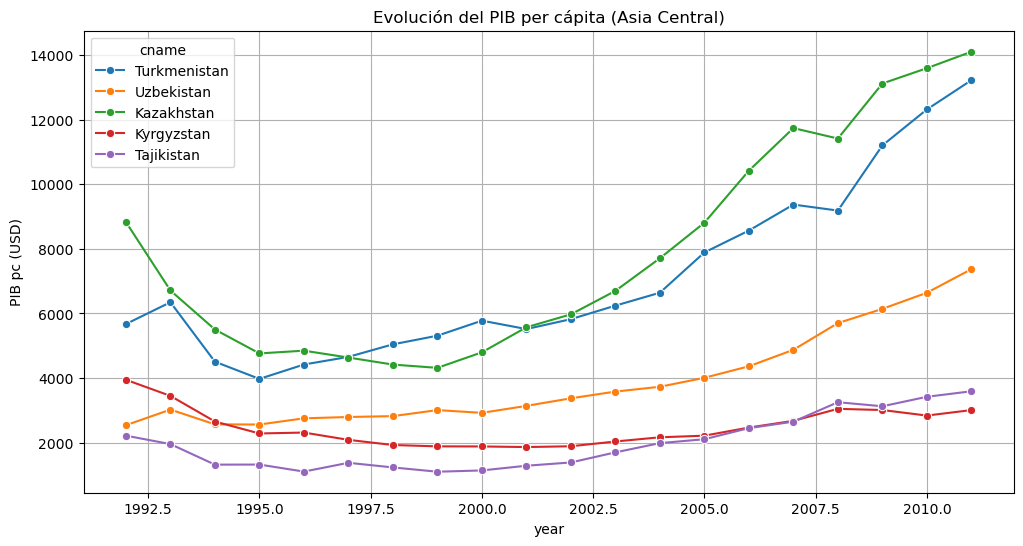

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=pdf, x='year', y='gle_cgdpc', hue='cname', marker='o')
plt.title('Evolución del PIB per cápita (Asia Central)')
plt.ylabel('PIB pc (USD)')
plt.grid(True)
plt.show()


## 2. Corrupción vs Democracia


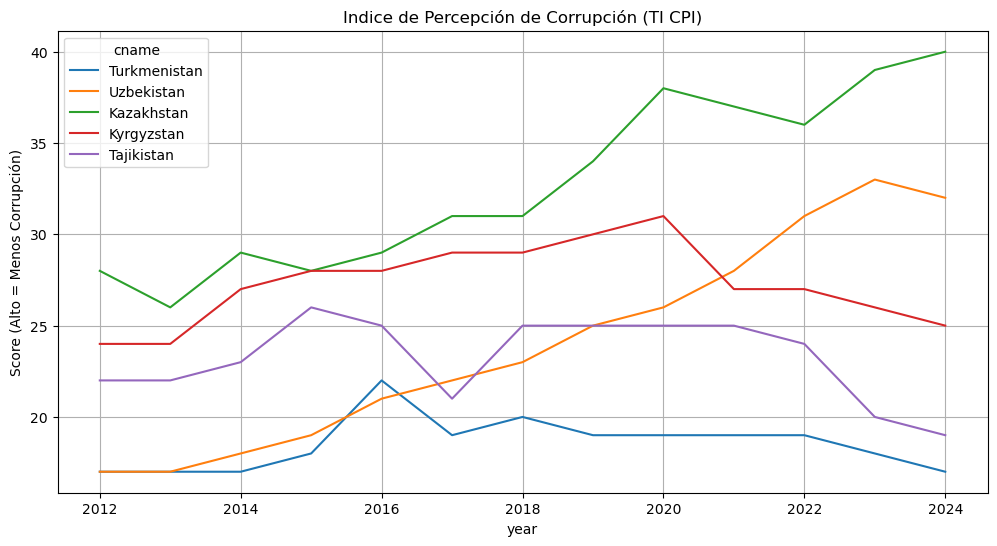

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=pdf, x='year', y='ti_cpi', hue='cname')
plt.title('Indice de Percepción de Corrupción (TI CPI)')
plt.ylabel('Score (Alto = Menos Corrupción)')
plt.grid(True)
plt.show()
